# 230968126 ML Lab Week 3

Name :- Kewal Thacker, Section :- A1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
import sklearn

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Exercise 2

For the IRIS data set write down the meta information. 

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])


In [12]:
X = df[['Id','SepalLengthCm','PetalLengthCm','PetalWidthCm']]
Y = df['Species']

Visualize the class label against the predictor variable using appropriate plots.

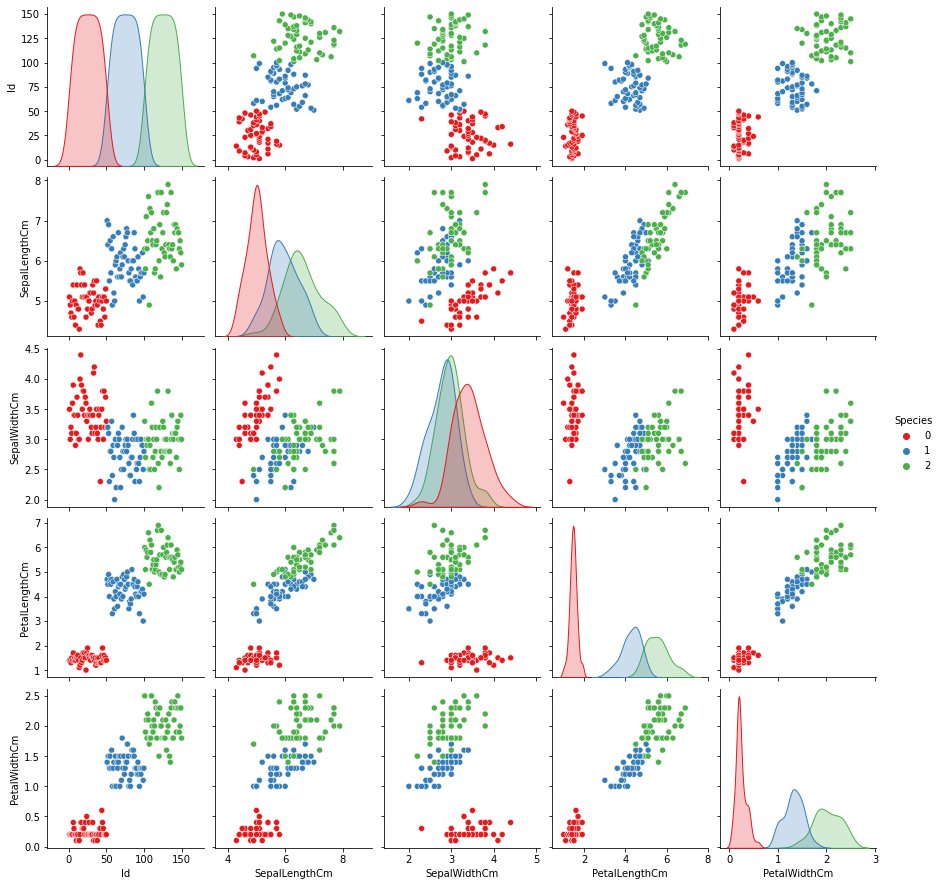

In [14]:
sns.pairplot(df, hue="Species", palette="Set1")

Use the IRIS data set to build a logistic regression model (using sklearn) and predict the 
class label ‘Species’. Divide the dataset into training and test set (70,30) using 
train_test_split method in sklearn. 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30,random_state = 43)

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Analysis and visualize the performance of the classifier using metrics, confusion matrix.

In [27]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<AxesSubplot:>

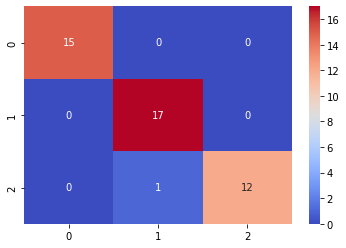

In [22]:
cmatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cmatrix,annot = True, cmap = 'coolwarm')

In [23]:
cmatrix

array([[15,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 12]], dtype=int64)

Use the IRIS data and KNeighborsClassifier (using sklearn) and predict the class label 
‘Species’ for k value between 2 and 20. Divide the dataset into training and test set 
(70,30) using train_test_split method in sklearn. 
Identify the best k (for k between 2 and 20) for the model built. 

The best k value is 2 with an accuracy of 1.0000


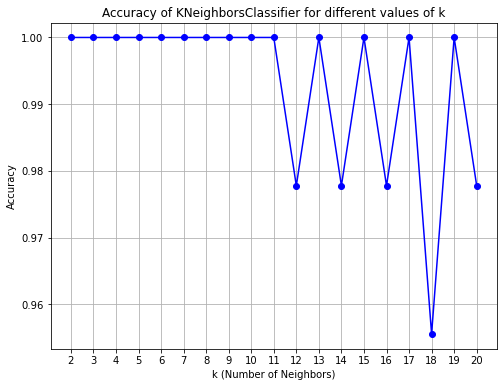

In [28]:
from sklearn.neighbors import KNeighborsClassifier
k_values = range(2, 21)
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)

print(f"The best k value is {best_k} with an accuracy of {best_accuracy:.4f}")

pl.figure(figsize=(8, 6))
pl.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
pl.title('Accuracy of KNeighborsClassifier for different values of k')
pl.xlabel('k (Number of Neighbors)')
pl.ylabel('Accuracy')
pl.xticks(k_values)
pl.grid(True)
pl.show()

Here Overall in general the Logistic Regression does a very good job with an 
accuracy of 98% but with a K value of from 2-11, the KNN algorithm achieves a 100% accuracy

Comment on the classifier (Logistic Regression or KNeighborsClassifier ) that has a 
better performance for the IRIS dataset.

Since the IRIS dataset has 3 classes, the KNeigborsClassifier shows a better performance than Logistic Regression, which is primarily used for binary classification